<a href="https://colab.research.google.com/github/domoto86/lcbo-clustering/blob/main/LCBO_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
main_data_df = pd.read_csv('lcbo_wines.csv')

In [3]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Sugar Content,Varietal,By,Release Date,Lat,Lon,Savings,MadeIn
0,Kilikanoon Killerman's Run Shiraz,19.95,17.95,4.8,-8,750 ml bottle,This Shiraz is Kilikanoon's idea of an entry-l...,Red Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.145,"South Australia, Australia",4 g/L,Shiraz/Syrah,Kilikanoon,"April 1, 2022",-30.534367,135.630121,2.0,Australia
1,Sandbanks Summer Rosé VQA,14.95,12.95,NaN,0,750 ml bottle,"Established in Prince Edward County in 2001, S...",Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.116,"Ontario, Canada",27 g/L,Rosé,Sandbanks,NaN,50.000678,-86.000977,2.0,Canada
2,Santa Carolina Reserva Sauvignon Blanc,46.05,43.05,3.7,-3,3000 ml bagnbox,Sauvignon blanc continues to grow in popularit...,White Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.125,"Leyda Valley, Chile",4 g/L,Sauvignon Blanc,NaN,NaN,-33.747180,-71.515503,3.0,Chile
3,Paul Mas Cabernet Sauvignon,14.95,12.95,NaN,0,750 ml bottle,Paul Mas vineyards are in the Languedoc region...,Red Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.135,"Languedoc, France",5 g/L,Cabernet Sauvignon,NaN,NaN,47.218868,5.965036,2.0,France
4,La Vieille Ferme Rose Ventoux AOC,14.95,12.95,4.7,-10,750 ml bottle,Grapes grown on the slopes of France's Mont Ve...,Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,0.130,"Rhône, France",2 g/L,Rosé,La Vieille Ferme,NaN,45.880235,4.564534,2.0,France


In [4]:
main_data_df.dtypes


Name              object
Regular Price    float64
Sale Price       float64
Rating           float64
Reviews            int64
Size              object
Description       object
Category          object
Image             object
Alcohol/Vol      float64
Made In           object
Sugar Content     object
Varietal          object
By                object
Release Date      object
Lat              float64
Lon              float64
Savings          float64
MadeIn            object
dtype: object

In [5]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content'].str.replace('g/L', '')
# main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol'].str.replace('%', '')
main_data_df = main_data_df.fillna(0)
main_data_df = main_data_df.drop(['Sugar Content'], axis = 1)

In [6]:
main_data_df['Sugar Content (g/L)'] = main_data_df['Sugar Content (g/L)'].astype(float)
main_data_df['Alcohol/Vol'] = main_data_df['Alcohol/Vol']  * 100
main_data_df['Regular Price'] = main_data_df['Regular Price'].astype(float)
main_data_df['Sale Price'] = main_data_df['Sale Price'].astype(float)

In [7]:
main_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 50 non-null     object 
 1   Regular Price        50 non-null     float64
 2   Sale Price           50 non-null     float64
 3   Rating               50 non-null     float64
 4   Reviews              50 non-null     int64  
 5   Size                 50 non-null     object 
 6   Description          50 non-null     object 
 7   Category             50 non-null     object 
 8   Image                50 non-null     object 
 9   Alcohol/Vol          50 non-null     float64
 10  Made In              50 non-null     object 
 11  Varietal             50 non-null     object 
 12  By                   50 non-null     object 
 13  Release Date         50 non-null     object 
 14  Lat                  50 non-null     float64
 15  Lon                  50 non-null     float

In [8]:
main_data_df.head()

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Varietal,By,Release Date,Lat,Lon,Savings,MadeIn,Sugar Content (g/L)
0,Kilikanoon Killerman's Run Shiraz,19.95,17.95,4.8,-8,750 ml bottle,This Shiraz is Kilikanoon's idea of an entry-l...,Red Wine,https://aem.lcbo.com/content/dam/lcbo/products...,14.5,"South Australia, Australia",Shiraz/Syrah,Kilikanoon,"April 1, 2022",-30.534367,135.630121,2.0,Australia,4.0
1,Sandbanks Summer Rosé VQA,14.95,12.95,0.0,0,750 ml bottle,"Established in Prince Edward County in 2001, S...",Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,11.6,"Ontario, Canada",Rosé,Sandbanks,0,50.000678,-86.000977,2.0,Canada,27.0
2,Santa Carolina Reserva Sauvignon Blanc,46.05,43.05,3.7,-3,3000 ml bagnbox,Sauvignon blanc continues to grow in popularit...,White Wine,https://aem.lcbo.com/content/dam/lcbo/products...,12.5,"Leyda Valley, Chile",Sauvignon Blanc,0,0,-33.747180,-71.515503,3.0,Chile,4.0
3,Paul Mas Cabernet Sauvignon,14.95,12.95,0.0,0,750 ml bottle,Paul Mas vineyards are in the Languedoc region...,Red Wine,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,"Languedoc, France",Cabernet Sauvignon,0,0,47.218868,5.965036,2.0,France,5.0
4,La Vieille Ferme Rose Ventoux AOC,14.95,12.95,4.7,-10,750 ml bottle,Grapes grown on the slopes of France's Mont Ve...,Rose Wine,https://aem.lcbo.com/content/dam/lcbo/products...,13.0,"Rhône, France",Rosé,La Vieille Ferme,0,45.880235,4.564534,2.0,France,2.0


In [9]:
main_data_df['Category'].value_counts()

Red Wine                     25
White Wine                   15
Rose Wine                     6
White Sparkling Wine          3
Rosé & Red Sparkling Wine     1
Name: Category, dtype: int64

In [10]:
main_data_df['Category']=main_data_df['Category'].astype('category').cat.codes

In [11]:
main_data_df.head(2)

,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Varietal,By,Release Date,Lat,Lon,Savings,MadeIn,Sugar Content (g/L)
0,Kilikanoon Killerman's Run Shiraz,19.95,17.95,4.8,-8,750 ml bottle,This Shiraz is Kilikanoon's idea of an entry-l...,0,https://aem.lcbo.com/content/dam/lcbo/products...,14.5,"South Australia, Australia",Shiraz/Syrah,Kilikanoon,"April 1, 2022",-30.534367,135.630121,2.0,Australia,4.0
1,Sandbanks Summer Rosé VQA,14.95,12.95,0.0,0,750 ml bottle,"Established in Prince Edward County in 2001, S...",1,https://aem.lcbo.com/content/dam/lcbo/products...,11.6,"Ontario, Canada",Rosé,Sandbanks,0,50.000678,-86.000977,2.0,Canada,27.0


In [12]:
main_scaled= StandardScaler().fit_transform(main_data_df[[
    'Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)', 'Category']])
main_scaled

array([[-0.0639094 , -0.03985579,  1.05740842, -0.42155423, -0.86516854],
       [-0.56634177, -0.57126626, -0.69888277,  1.87601622, -0.30337079],
       [ 2.5587876 ,  2.62782478, -0.15382688, -0.42155423,  1.38202247],
       [-0.56634177, -0.57126626,  0.45179077, -0.32165986, -0.86516854],
       [-0.56634177, -0.57126626,  0.14898194, -0.62134297, -0.30337079],
       [-0.46083097, -0.45967006,  0.14898194, -0.62134297,  1.38202247],
       [-0.56634177, -0.57126626,  0.14898194, -0.62134297,  1.38202247],
       [-0.30005261, -0.28961871,  0.14898194, -0.62134297, -0.86516854],
       [-0.3603445 , -0.45967006,  0.75459959, -0.5214486 , -0.86516854],
       [-0.66682825, -0.67754835,  0.45179077, -0.62134297, -0.86516854],
       [-0.36536882, -0.35870207, -0.75944453,  0.47749508,  0.25842697],
       [-0.15434723, -0.24179176, -1.06225336,  0.67728381,  0.82022472],
       [ 3.45814155,  3.47276742,  1.36021724, -0.02197676, -0.86516854],
       [-0.25985802, -0.35338796,  0.7

In [13]:

main_scaled_df = pd.DataFrame(main_scaled, columns = [
    'Regular Price', 'Sale Price', 'Alcohol/Vol', 'Sugar Content (g/L)', 'Category'])

In [14]:
main_scaled_df.sample(20)

,Regular Price,Sale Price,Alcohol/Vol,Sugar Content (g/L),Category
10,-0.365369,-0.358702,-0.759445,0.477495,0.258427
14,-0.350296,-0.449042,0.148982,-0.321660,1.382022
25,-0.566342,-0.571266,0.451791,-0.221765,1.382022
6,-0.566342,-0.571266,0.148982,-0.621343,1.382022
41,0.061699,-0.013285,0.451791,-0.221765,-0.865169
48,-0.365369,-0.358702,0.875723,-0.521449,-0.865169
0,-0.063909,-0.039856,1.057408,-0.421554,-0.865169
7,-0.300053,-0.289619,0.148982,-0.621343,-0.865169
43,-0.867801,-0.783830,0.451791,-0.521449,-0.865169
28,-0.068934,-0.045170,0.451791,-0.121871,1.382022


In [15]:
inertia=[]
k=list(range(1, 15))

In [16]:
for i in k:
    category_model=KMeans(n_clusters=i, random_state=0)
    category_model.fit(main_scaled_df)
    inertia.append(category_model.inertia_)

C:\Users\nohn7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nohn7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nohn7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nohn7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [17]:
category_elbow = {'k':k, 'inertia':inertia}
elbow_df = pd.DataFrame(category_elbow)

In [18]:
elbow_df.head()

,k,inertia
0,1,250.000000
1,2,170.681133
2,3,113.334072
3,4,68.827626
4,5,50.431964


<Axes: xlabel='k'>

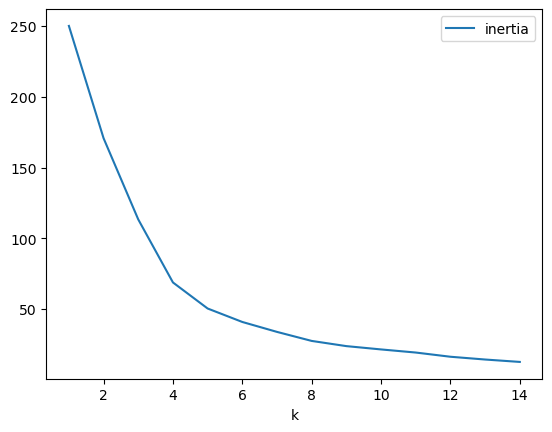

In [19]:
elbow_df.plot('k', 'inertia')

In [20]:
model=KMeans(n_clusters=5, random_state=0)

In [21]:
model.fit(main_scaled_df)

C:\Users\nohn7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nohn7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [22]:
category_predict_df = model.predict(main_scaled_df)

In [23]:
main_data_df['Segment'] = category_predict_df

In [24]:
main_data_df.sample(10)


,Name,Regular Price,Sale Price,Rating,Reviews,Size,Description,Category,Image,Alcohol/Vol,Made In,Varietal,By,Release Date,Lat,Lon,Savings,MadeIn,Sugar Content (g/L),Segment
2,Santa Carolina Reserva Sauvignon Blanc,46.05,43.05,3.7,-3,3000 ml bagnbox,Sauvignon blanc continues to grow in popularit...,4,https://aem.lcbo.com/content/dam/lcbo/products...,12.5,"Leyda Valley, Chile",Sauvignon Blanc,0,0,-33.747180,-71.515503,3.0,Chile,4.0,2
11,Fiol Prosecco DOC,19.05,16.05,5.0,-3,750 ml bottle,Clear pale straw colour with persistent bubble...,3,https://aem.lcbo.com/content/dam/lcbo/products...,11.0,"Veneto, Italy",Glera,Fiol,0,45.647666,11.866525,3.0,Italy,15.0,4
10,Juliet Prosecco Rose DOC,16.95,14.95,5.0,-5,750 ml bottle,A delightful prosecco rosé showcasing aromas a...,2,https://aem.lcbo.com/content/dam/lcbo/products...,11.5,"Veneto, Italy",Sparkling Rose,Colli Vicentini,0,45.647666,11.866525,2.0,Italy,13.0,4
35,The Seven Deadly Zins Old Vine Zinfandel,24.95,21.95,4.7,-12,750 ml bottle,Zinfully delicious Cali Zinfandel that feature...,0,https://aem.lcbo.com/content/dam/lcbo/products...,15.0,"California, United States",Zinfandel,Seven Deadly Zins,"April 1, 2022",36.701463,-118.755997,3.0,UnitedStates,7.0,1
3,Paul Mas Cabernet Sauvignon,14.95,12.95,0.0,0,750 ml bottle,Paul Mas vineyards are in the Languedoc region...,0,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,"Languedoc, France",Cabernet Sauvignon,0,0,47.218868,5.965036,2.0,France,5.0,1
13,The Wanted Zin Old Vines Zinfandel IGT,18.00,15.00,4.5,-14,750 ml bottle,You'll want this Italian zinfandel in your col...,0,https://aem.lcbo.com/content/dam/lcbo/products...,14.0,"Puglia, Italy",Primitivo,The Wanted,0,45.073147,9.645503,3.0,Italy,14.0,1
18,Kim Crawford Rosé,21.95,19.95,5.0,-3,750 ml bottle,Hawke's Bay is one of New Zealand's oldest win...,1,https://aem.lcbo.com/content/dam/lcbo/products...,12.5,"Hawke's Bay, New Zealand",Rosé,Kim Crawford,"April 1, 2022",-39.525651,176.761146,2.0,NewZealand,3.0,1
46,Jacob's Creek Grenache Shiraz,15.95,12.95,5.0,-1,750 ml bottle,"A legend in Southeastern Australia, Jacob's Cr...",0,https://aem.lcbo.com/content/dam/lcbo/products...,14.0,Australia,0,Jacob's Creek,0,-24.776109,134.755000,3.0,Australia,9.0,1
42,Silk & Spice Red,15.85,13.85,4.4,-22,750 ml bottle,Portugal's heritage of exploration is celebrat...,0,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,Portugal,Red Blend,Silk & Spice,0,39.662165,-8.135352,2.0,Portugal,17.0,1
43,Caliterra Cabernet Sauvignon,11.95,10.95,5.0,-6,750 ml bottle,"Ruby red colour; lifted chocolate, herbs, smok...",0,https://aem.lcbo.com/content/dam/lcbo/products...,13.5,Chile,Cabernet Sauvignon,Caliterra,0,-31.761336,-71.318770,1.0,Chile,3.0,1


In [25]:
main_data_df['Segment'].value_counts()

1    25
3    12
4     8
2     4
0     1
Name: Segment, dtype: int64

<Axes: xlabel='Sugar Content (g/L)', ylabel='Segment'>

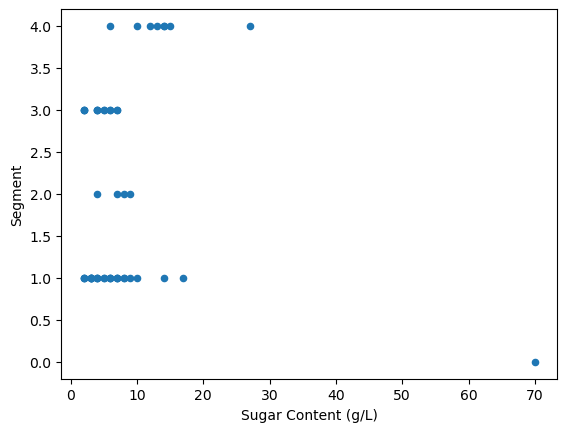

In [26]:
main_data_df.plot.scatter('Sugar Content (g/L)','Segment')

<Axes: xlabel='Segment', ylabel='Sugar Content (g/L)'>

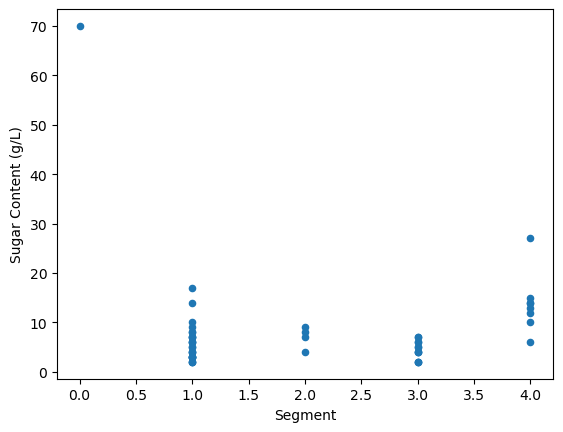

In [27]:
main_data_df.plot.scatter('Segment', 'Sugar Content (g/L)')

In [81]:
main_data_df.to_csv('category_cluster.csv', index = False)